In [1]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, Bounds
import sympy as sym
import matplotlib.pyplot as plt

In [6]:
a = int(input('a = '))
b = int(input('b = '))
c = int(input('c = '))

In [7]:
def gr(data):
    der = np.zeros_like(data)
    der[0] = -1
    der[1] = -a

    return der

def F(data):
    x, y = data
    return -(x + a * y)


x_min = 0
y_min = 0
x_max = np.inf
y_max = np.inf
bounds = Bounds([x_min, y_min], [x_max, y_max])

linear_constraints = [LinearConstraint([1, 2], -np.inf, 10),
                      LinearConstraint([3, 2], -np.inf, 18),
                      LinearConstraint([1, -1], -b, np.inf),
                      LinearConstraint([c, -1], -np.inf, 8*c + 3)]
x0 = np.array([1.0, 1.0])

res = minimize(F, x0, jac=gr, constraints=linear_constraints, options={'disp': True})

u = res.x[0]
v = res.x[1]
F_max = -res.fun
print(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -29.99999999999684
            Iterations: 3
            Function evaluations: 3
            Gradient evaluations: 3
[-4.49640325e-14  5.00000000e+00]


In [10]:
print("Оптим. значения: x = ", u, "y = ", v, "max значение: ", F_max)

Оптим. значения: x =  -4.496403249731884e-14 y =  4.999999999999481 max значение:  29.99999999999684


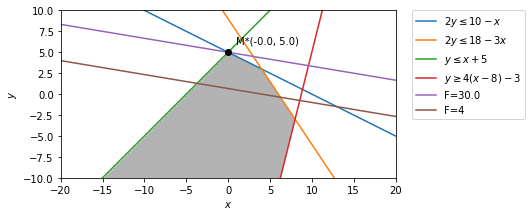

In [11]:
d = np.linspace(-20,20,200)
x,y = np.meshgrid(d,d)

plt.imshow( ((2*y<=10-x) & (2*y<=18-3*x) & (y<=x+b) & (y>=c*x-8*c-3)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

x = np.linspace(-20, 20, 2000)

y1 = (10-x)/2.0
y2 = (18-3*x)/2.0
y3 = x + b
y4 = c*x - 8*c - 3

y5 = F_max/a - x/a
y6 = 4/a - x/a


plt.plot(x, y1, label=r'$2y\leq 10-x$')
plt.plot(x, y2, label=r'$2y\leq 18-3x$')
plt.plot(x, y3, label=fr'$y\leq x + {b}$')
plt.plot(x, y4, label=fr'$y\geq {c}(x-8)-3$')

plt.plot(x, y5, label=f'F={F_max.round(3)}')
plt.plot(x, y6, label='F=4')

plt.xlim(-20,20)
plt.ylim(-10,10)

plt.plot(u, v, "ko")
plt.text(u + 1, v + 1, f"M*({u.round(3)}, {v.round(3)})")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()